In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data = np.array(data)

In [2]:
# Prepare data
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = torch.FloatTensor(data_dev[0])  # Convert to float tensor
X_dev = torch.FloatTensor(data_dev[1:n]) / 255.0  # Normalize and convert to float tensor

data_train = data[1000:m].T
Y_train = torch.FloatTensor(data_train[0])  # Convert to float tensor
X_train = torch.FloatTensor(data_train[1:n]) / 255.0  # Normalize and convert to float tensor

# Reshape for PyTorch (samples, features)
X_train = X_train.T  # Shape: (41000, 784)
X_dev = X_dev.T      # Shape: (1000, 784)

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer
        self.relu = nn.ReLU()            # ReLU activation
        self.fc2 = nn.Linear(128, 10)    # Second layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [4]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Adam optimizer
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, Y_train.long())  # Calculate loss
    
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    
    if epoch % 10 == 0:  # Print every 10 epochs
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

Epoch [0/100], Loss: 2.3126
Epoch [10/100], Loss: 2.1225
Epoch [20/100], Loss: 1.8585
Epoch [30/100], Loss: 1.5356
Epoch [40/100], Loss: 1.2391
Epoch [50/100], Loss: 1.0180
Epoch [60/100], Loss: 0.8652
Epoch [70/100], Loss: 0.7591
Epoch [80/100], Loss: 0.6830
Epoch [90/100], Loss: 0.6265


Prediction: 4
Label: 4


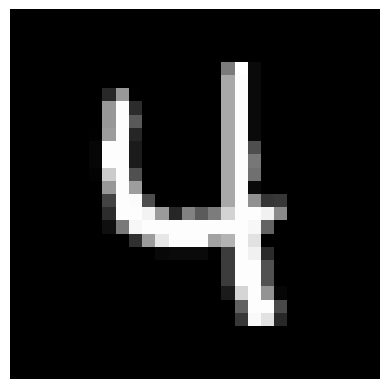

Prediction: 1
Label: 1


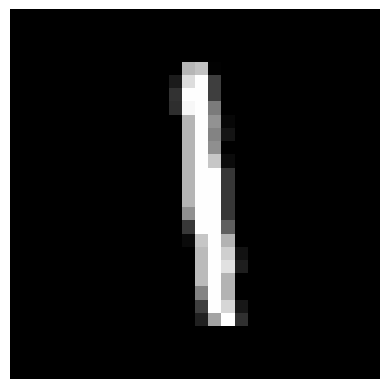

Prediction: 7
Label: 7


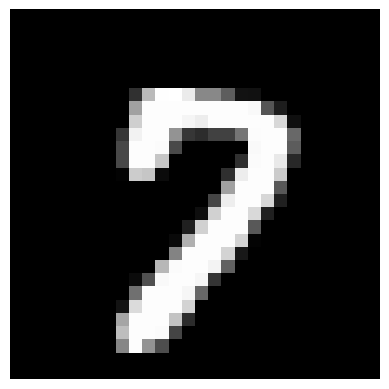

Prediction: 9
Label: 9


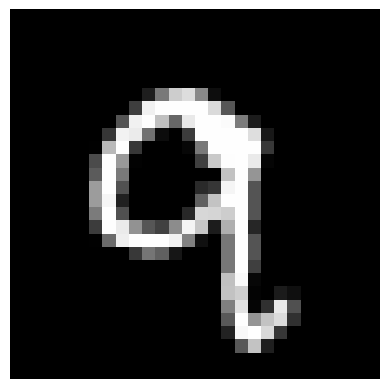

Prediction: 0
Label: 0


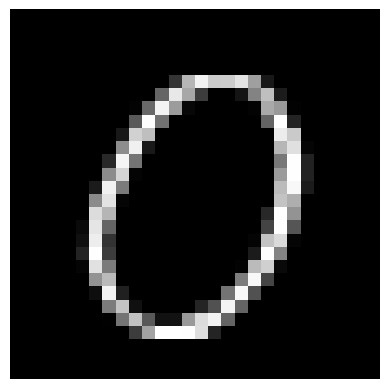

In [5]:
def test_prediction(model, index):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        current_image = X_dev[index].reshape(1, 784)  # Reshape for the model
        prediction = model(current_image)
        predicted_label = torch.argmax(prediction).item()
        actual_label = Y_dev[index].item()

        print(f"Prediction: {predicted_label}")
        print(f"Label: {int(actual_label)}")

        # Display the image
        plt.imshow(current_image.reshape(28, 28).numpy(), cmap='gray')
        plt.axis('off')
        plt.show()

# Test predictions on a few images
for i in range(5):  # Test the first 5 images
    test_prediction(model, i)
